In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

In [2]:
df=pd.read_csv('E:/aman/studentonlinestudy/aman13.csv')

In [3]:
df.head()

,phi-ear,phi-eye,phi-joint,phi-obesity,hour
0,no,yes,yes,yes,5
1,no,yes,no,yes,6
2,no,yes,yes,yes,6
3,no,no,yes,yes,7
4,no,yes,yes,no,7


In [4]:
df.shape

(307, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   phi-ear      307 non-null    object
 1   phi-eye      307 non-null    object
 2   phi-joint    307 non-null    object
 3   phi-obesity  307 non-null    object
 4   hour         307 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 12.1+ KB


In [6]:
X=df[['phi-eye', 'phi-ear', 'phi-joint','phi-obesity']]
y=df['hour']
features=list(df.columns[:4])
print(features)

['phi-ear', 'phi-eye', 'phi-joint', 'phi-obesity']


In [10]:
d={'yes':1,'no':0}
df['phi-eye']=df['phi-eye'].map(d)
df['phi-ear']=df['phi-ear'].map(d)
df['phi-joint']=df['phi-joint'].map(d)
df['phi-obesity']=df['phi-obesity'].map(d)
df.head()

,phi-ear,phi-eye,phi-joint,phi-obesity,hour
0,0,1.0,1.0,1,5
1,0,1.0,0.0,1,6
2,0,1.0,1.0,1,6
3,0,0.0,1.0,1,7
4,0,1.0,1.0,0,7


In [11]:
x= df.drop(labels = 'hour', axis = 1)
y = df['hour']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 7
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: 5
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 6
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: 7
|   |--- feature_0 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 7
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: 7
|--- feature_1 >  0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 7
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: 6
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 7
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: 7
|   |--- fe

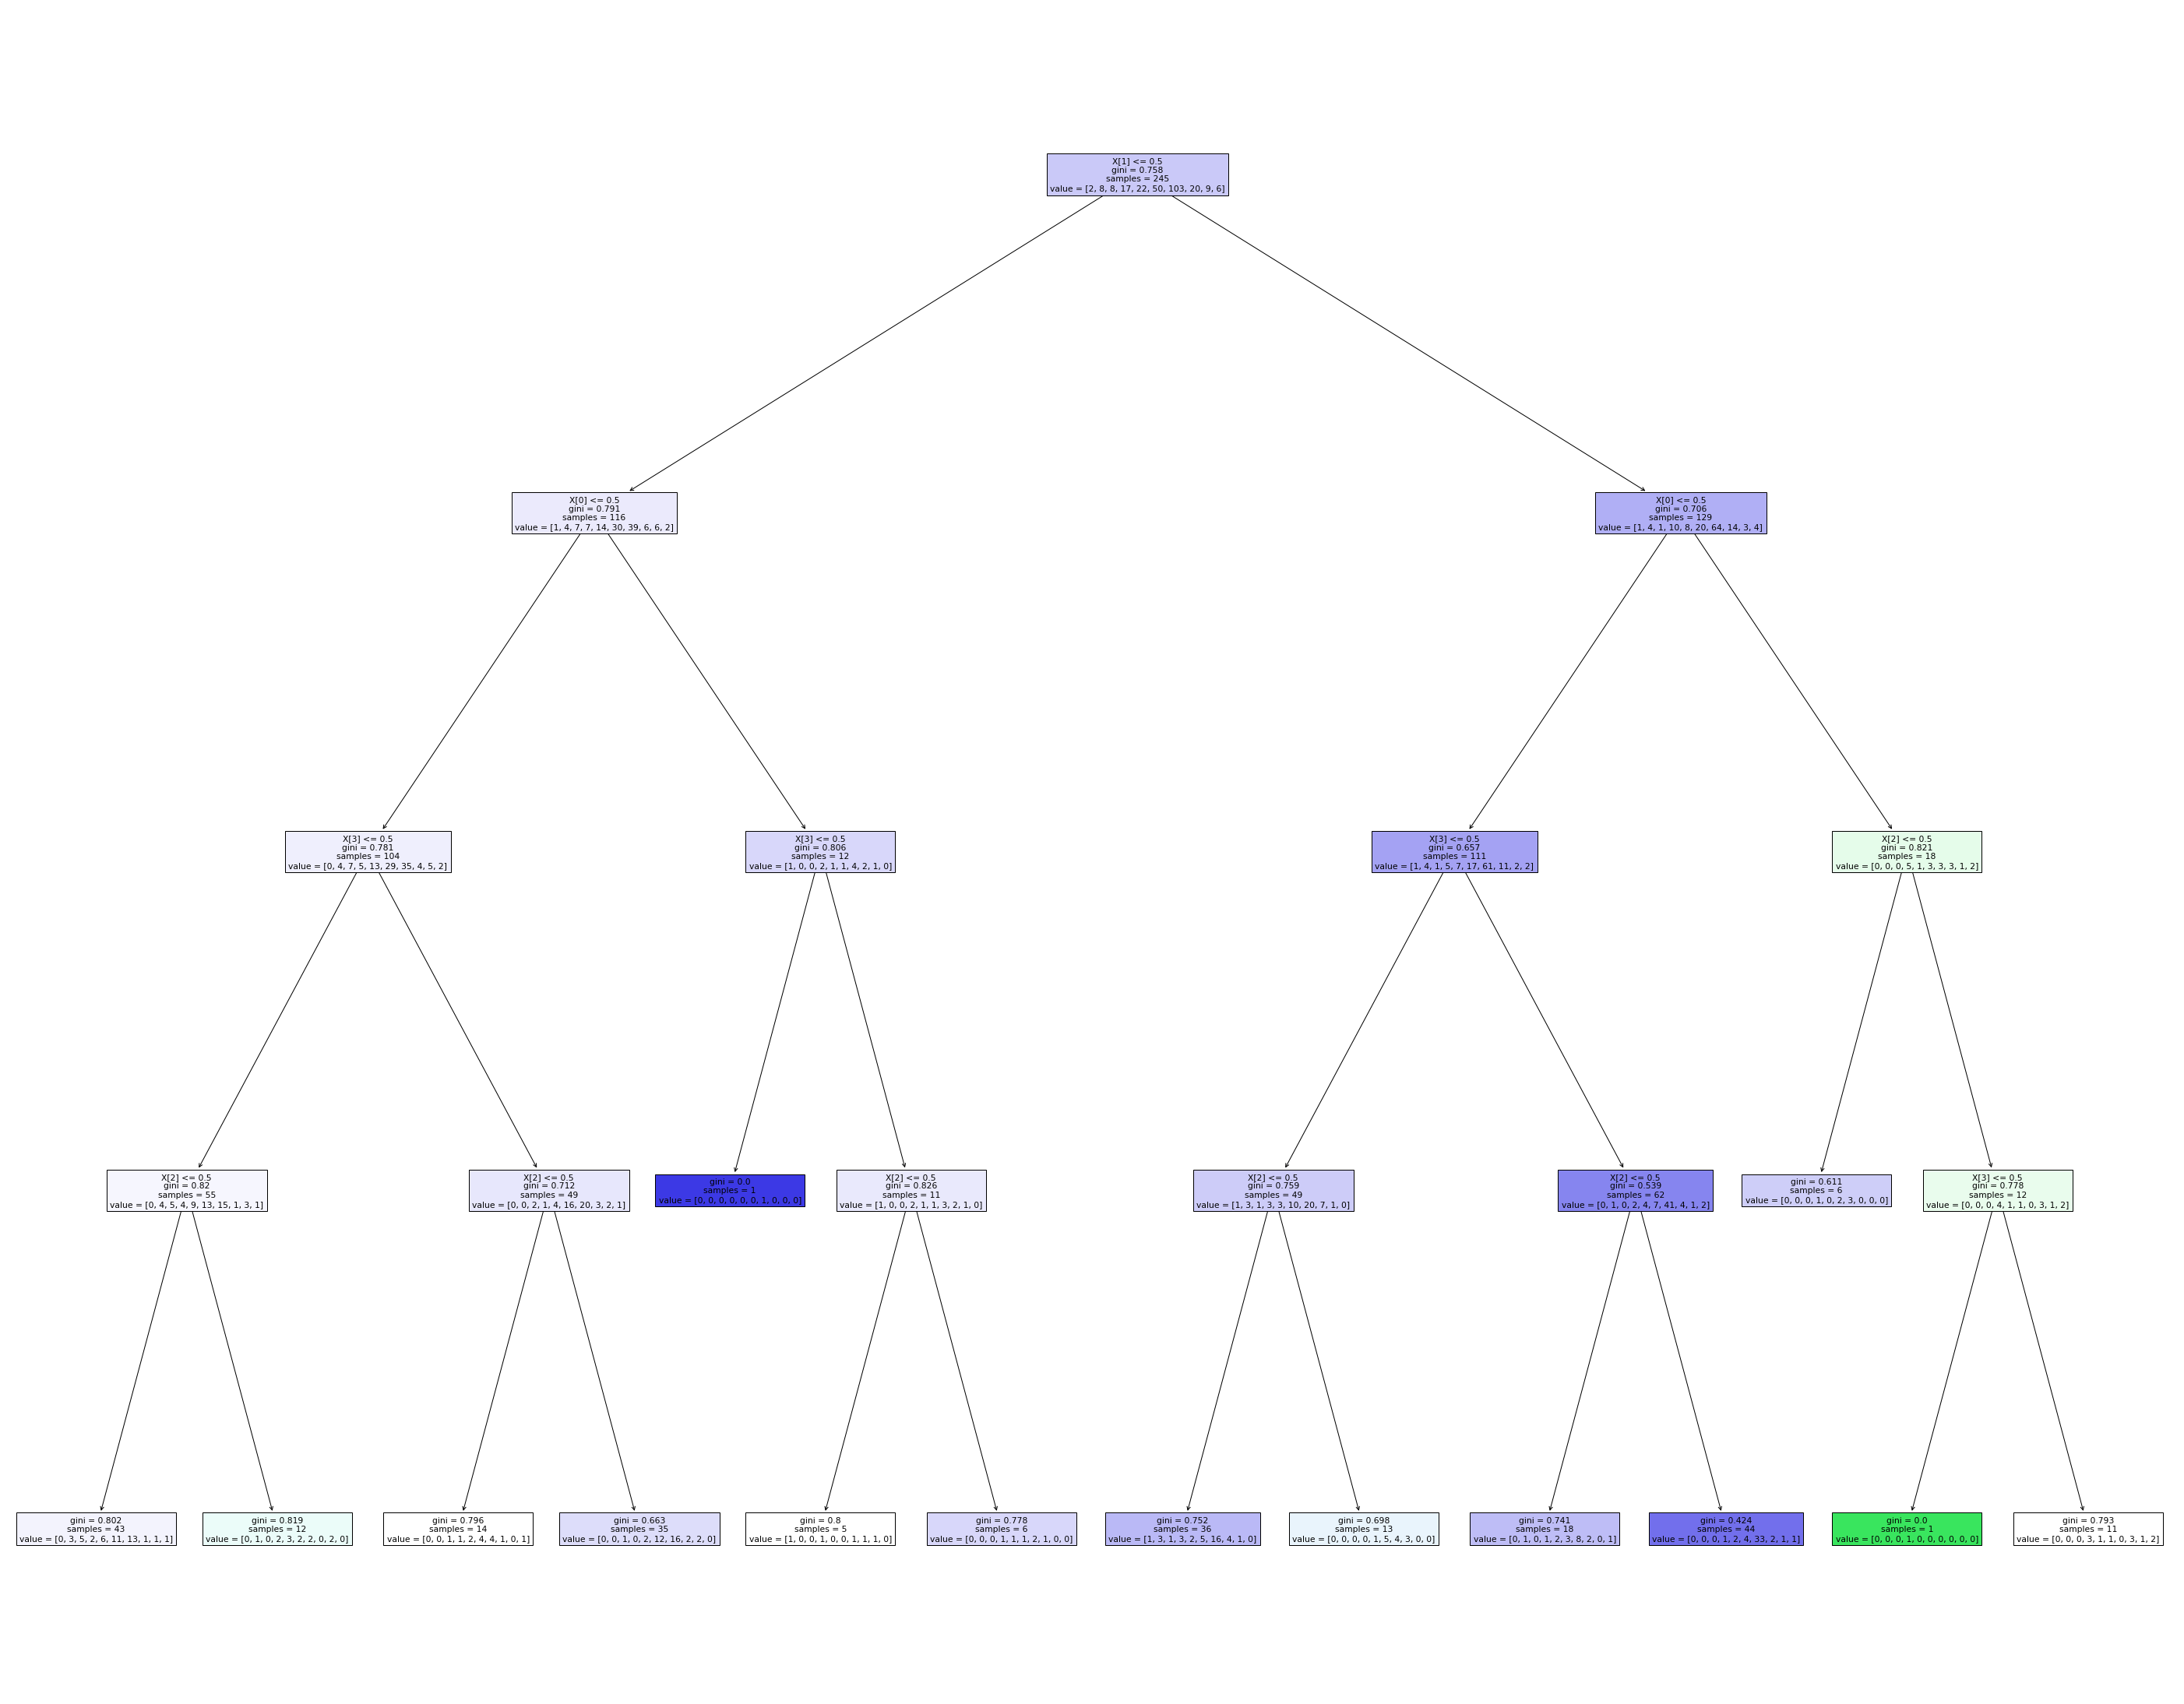

In [15]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(model, 
                  
                   filled=True)